## Подготовка

https://docs.google.com/spreadsheets/d/1gz89xy8zGEWZz7m1FnLcgWV1lQQV2MadBdYv4q048Dk/edit?usp=sharing


In [4]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1gz89xy8zGEWZz7m1FnLcgWV1lQQV2MadBdYv4q048Dk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1gz89xy8zGEWZz7m1FnLcgWV1lQQV2MadBdYv4q048Dk 



In [28]:
import pandas as pd
import numpy as np

In [8]:
df = pd.read_excel('Тестовый отчет_доктор_док_12.01.22_08.30.xlsx')

## Просмотр датафрейма

In [9]:
df.head()

,Товар (офф. Наименование),Цена,Регион,Федеральный округ,Наименование на сайте,Цена на сайте,Сайт,Дата выкачки,Время выкачки,Ссылка
0,Жидкость для рук 80мл,NaN,Казань,Приволжский федеральный округ,ЖИДКОСТЬ ДЛЯ РУК АММИАК+ГЛИЦЕРОЛ+ЭТАНОЛ 80МЛ Р...,0.0,apteka.ru,12.01.2022,00:39,https://apteka.ru/product/zhidkost-dlya-ruk-am...
1,Мильгамма р-р д/в/м введ. 2мл №5 амп.,NaN,Уфа,Приволжский федеральный округ,МИЛЬГАММА 2МЛ N5 АМП Р-Р В/М,0.0,apteka.ru,12.01.2022,00:39,https://apteka.ru/product/milgamma-2ml-n5-amp-...
2,Назол Бэби капли наз. 0.125% 10мл д/младенцев ...,NaN,Белгород,Центральный федеральный округ,"НАЗОЛ БЭБИ 0,125% 10МЛ ФЛАК/КАП КАПЛИ НАЗАЛ",0.0,apteka.ru,12.01.2022,00:40,https://apteka.ru/product/nazol-bebi-0125-10ml...
3,Тантум Прополис пастилки №15 лес.ягоды БАД,NaN,Тула,Центральный федеральный округ,ТАНТУМ ПРОПОЛИС СО ВКУСОМ ЛЕСНЫХ ЯГОД N15 ПАСТ...,0.0,apteka.ru,12.01.2022,00:40,https://apteka.ru/product/tantum-propolis-so-v...
4,Нозефрин спрей наз. 50мкг/доза 120доз,NaN,Казань,Приволжский федеральный округ,"НОЗЕФРИН 50МКГ/ДОЗА 18,0 СПРЕЙ НАЗАЛЬН ДОЗИР 1...",0.0,apteka.ru,12.01.2022,00:40,https://apteka.ru/product/nozefrin-50mkgdoza-1...


In [10]:
df['Дата выкачки'].agg(['min','max'])

min    12.01.2022
max    12.01.2022
Name: Дата выкачки, dtype: object

## Задание
Аптечная сеть "Доктор Док" заключила договор на услугу мониторинг цен.
Задача - проанализировать отчет по мониторингу цен за 12.01.2022 (https://docs.google.com/spreadsheets/d/1D9aXswZlSxJsFmW671v_cB3O9cDB39ROf Zy7qCIvygo/edit#gid=853852798) и определить в нем несоответствия условиям договора и составить отчет о проделанной работе.
Условия договора:
1. Ежедневныймониторингценнасайтах:
• acmespb.ru
• apteka.ru
• aptekamos.ru
• aptekiplus.ru
• maksavit.ru
• ozerki.ru
• planetazdorovo.ru • po-aptekam.ru
• rigla.ru
• stolichki.ru
2. Врегионах:
• Казань
• Уфа
• Белгород
• Тула
• Санкт-Петербург • Владимир
• Екатеринбург
• Воронеж
• Астрахань
3. Количествоуникальныхтоваров(SKU),собираемыхнакаждомизсайтов должно составлять не менее 1000 в день.
Формат ответа (решения):
• Документ Microsoft Word;
• Описание несоответствий по каждому из условий договора;
• Ваши аргументированные выводы;
• Этапы и методы решения задачи.

## Проверка по регионам

In [24]:
print(f"Уникальных городов:  {pd.Series(df['Регион'].unique()).count()}")
print()
print(df['Регион'].value_counts())

Уникальных городов:  9

Тула               16107
Владимир           15806
Санкт-Петербург    12964
Воронеж            12671
Казань             11571
Астрахань           9831
Екатеринбург        8676
Уфа                 8624
Белгород            8170
Name: Регион, dtype: int64


Условия договора:
1. Ежедневный мониторинг цен на сайтах:
* acmespb.ru - есть
* apteka.ru - есть
* aptekamos.ru - нет
* aptekiplus.ru - есть
* maksavit.ru -есть
* ozerki.ru - нет
* planetazdorovo.ru - есть
* po-aptekam.ru - нет
* rigla.ru - нет
* stolichki.ru - есть

## Проверка по сайтам

In [32]:
print(f"Уникальных сайтов:  {pd.Series(df['Сайт'].unique()).count()}")
print()
print(f"Список:  {pd.Series(df['Сайт'].unique()).sort_values().values}")
print()
print(df['Сайт'].value_counts())

Уникальных сайтов:  6

Список:  ['acmespb.ru' 'apteka.ru' 'aptekiplus.ru' 'maksavit.ru'
 'planetazdorovo.ru' 'stolichki.ru']

aptekiplus.ru        35123
apteka.ru            19102
maksavit.ru          18877
planetazdorovo.ru    13911
stolichki.ru         13901
acmespb.ru            3506
Name: Сайт, dtype: int64



2. В регионах:
* Казань
* Уфа
* Белгород
* Тула
* Санкт-Петербург • Владимир
* Екатеринбург
* Воронеж
* Астрахань

все регионы присутствуют

## Проверка цен

In [25]:
df.isna().sum()

Товар (офф. Наименование)         0
Цена                         104420
Регион                            0
Федеральный округ                 0
Наименование на сайте             0
Цена на сайте                     0
Сайт                              0
Дата выкачки                      0
Время выкачки                     0
Ссылка                            0
dtype: int64

все строчки пустые в столбце "цена"

In [26]:
df.describe()

,Цена,Цена на сайте
count,0.0,104420.000000
mean,NaN,615.546842
std,NaN,1070.794822
min,NaN,0.000000
25%,NaN,175.000000
50%,NaN,362.000000
75%,NaN,666.900000
max,NaN,24620.000000


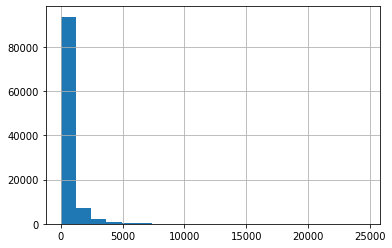

In [30]:
df['Цена на сайте'].hist(bins=20)

In [31]:
df['Цена на сайте'].value_counts()

0.0       6056
299.0      143
189.0      140
545.0      131
139.0      129
          ... 
419.3        1
418.8        1
1667.5       1
1667.7       1
1808.0       1
Name: Цена на сайте, Length: 12496, dtype: int64

В столбце "Цена на сайте" 6тыс строк с ценой 0

## Проверка по продуктам

In [33]:
df.head()

,Товар (офф. Наименование),Цена,Регион,Федеральный округ,Наименование на сайте,Цена на сайте,Сайт,Дата выкачки,Время выкачки,Ссылка
0,Жидкость для рук 80мл,NaN,Казань,Приволжский федеральный округ,ЖИДКОСТЬ ДЛЯ РУК АММИАК+ГЛИЦЕРОЛ+ЭТАНОЛ 80МЛ Р...,0.0,apteka.ru,12.01.2022,00:39,https://apteka.ru/product/zhidkost-dlya-ruk-am...
1,Мильгамма р-р д/в/м введ. 2мл №5 амп.,NaN,Уфа,Приволжский федеральный округ,МИЛЬГАММА 2МЛ N5 АМП Р-Р В/М,0.0,apteka.ru,12.01.2022,00:39,https://apteka.ru/product/milgamma-2ml-n5-amp-...
2,Назол Бэби капли наз. 0.125% 10мл д/младенцев ...,NaN,Белгород,Центральный федеральный округ,"НАЗОЛ БЭБИ 0,125% 10МЛ ФЛАК/КАП КАПЛИ НАЗАЛ",0.0,apteka.ru,12.01.2022,00:40,https://apteka.ru/product/nazol-bebi-0125-10ml...
3,Тантум Прополис пастилки №15 лес.ягоды БАД,NaN,Тула,Центральный федеральный округ,ТАНТУМ ПРОПОЛИС СО ВКУСОМ ЛЕСНЫХ ЯГОД N15 ПАСТ...,0.0,apteka.ru,12.01.2022,00:40,https://apteka.ru/product/tantum-propolis-so-v...
4,Нозефрин спрей наз. 50мкг/доза 120доз,NaN,Казань,Приволжский федеральный округ,"НОЗЕФРИН 50МКГ/ДОЗА 18,0 СПРЕЙ НАЗАЛЬН ДОЗИР 1...",0.0,apteka.ru,12.01.2022,00:40,https://apteka.ru/product/nozefrin-50mkgdoza-1...


In [40]:
df.groupby('Сайт')['Товар (офф. Наименование)'].nunique()

Сайт
acmespb.ru           3503
apteka.ru            2092
aptekiplus.ru        4224
maksavit.ru          4571
planetazdorovo.ru    2269
stolichki.ru         4752
Name: Товар (офф. Наименование), dtype: int64

Количество уникальных товаров соответствует заданному условию (>1000)